In [45]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [46]:
df = pd.read_csv('./sci3_15min_20171001_20171014.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2017/10/01 00:00,北區,基礎大樓,主迴路,教學,91.0
1,2017/10/01 00:15,北區,基礎大樓,主迴路,教學,92.0
2,2017/10/01 00:30,北區,基礎大樓,主迴路,教學,91.0
3,2017/10/01 00:45,北區,基礎大樓,主迴路,教學,91.0
4,2017/10/01 01:00,北區,基礎大樓,主迴路,教學,90.0


In [47]:
newdf= df[['﻿時  間','用電量(單位:度)']]
print(newdf.describe()) 
print(newdf.shape) #How many data?

         用電量(單位:度)
count  1344.000000
mean    107.927827
std      19.391295
min      82.000000
25%      94.000000
50%     101.000000
75%     116.000000
max     186.000000
(1344, 2)


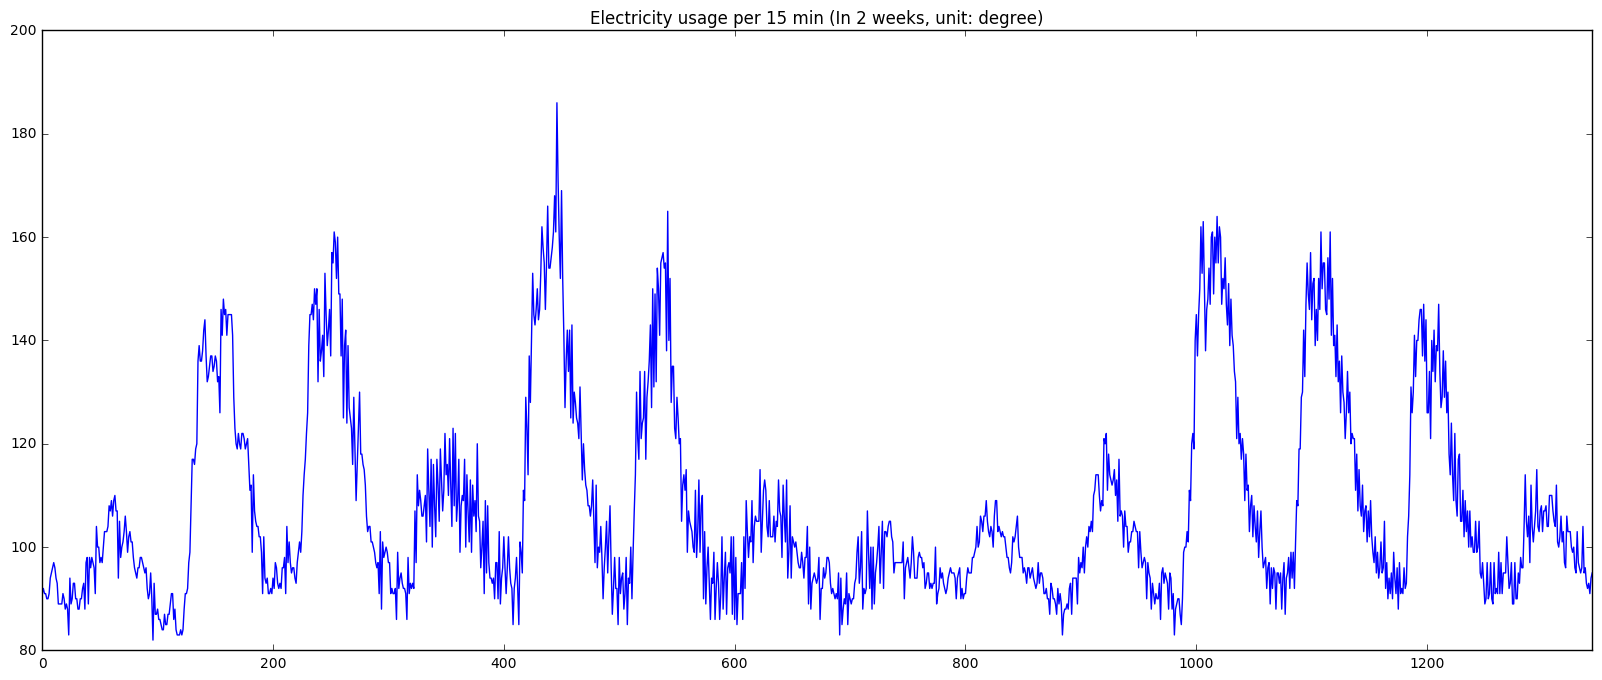

In [48]:
newdf['用電量(單位:度)'].plot.line()
matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [49]:
#把欄名改成英文
newdf = newdf.rename(index=str, columns={'﻿時  間':"Date_Time",'用電量(單位:度)':"Usage"}) 
newdf.columns

Index(['Date_Time', 'Usage'], dtype='object')

In [50]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

,Date_Time,Usage,hr,min
0,2017/10/01,91.0,00,00
1,2017/10/01,92.0,00,15
2,2017/10/01,91.0,00,30
3,2017/10/01,91.0,00,45
4,2017/10/01,90.0,01,00


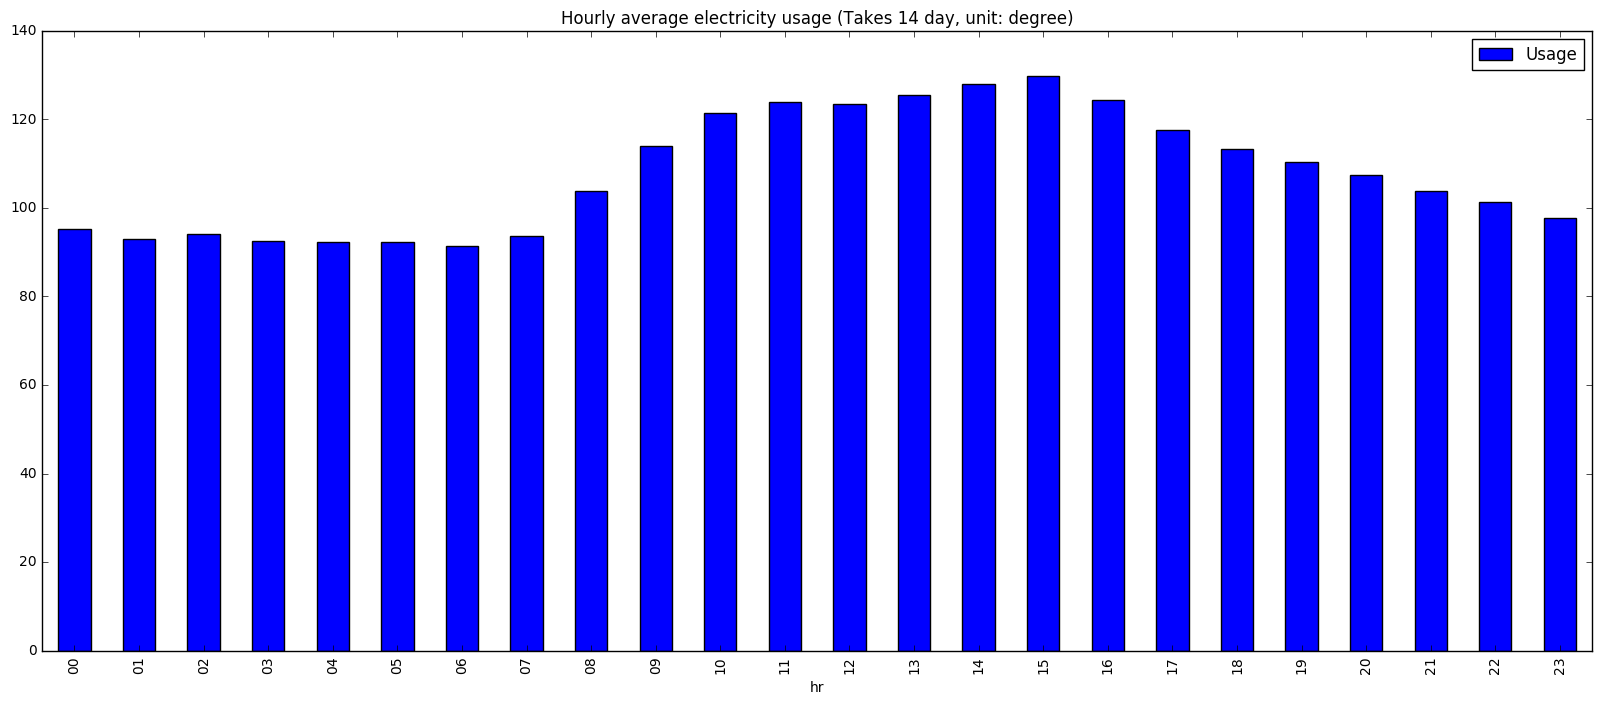

In [51]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

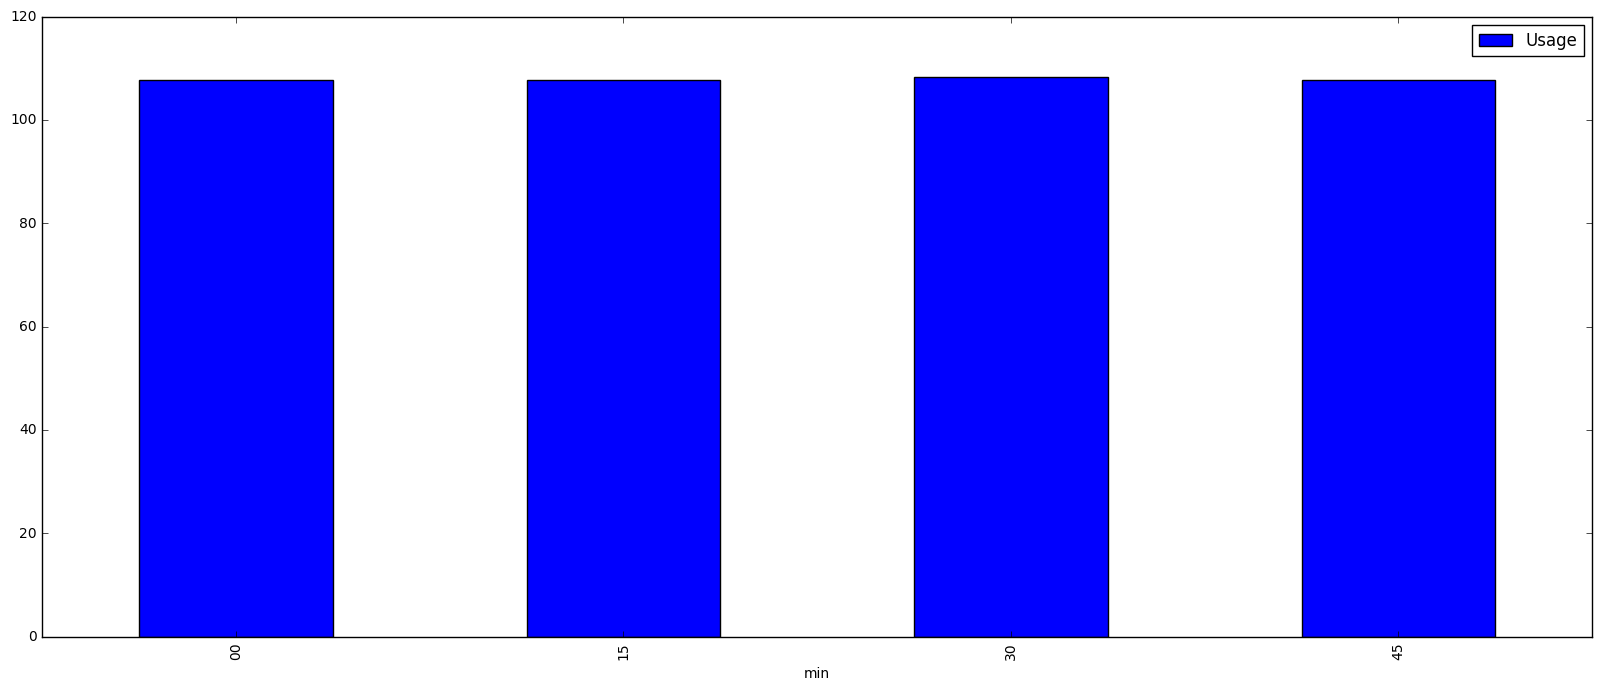

In [52]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

In [57]:
dfnew_byDay = newdf.groupby(['Date_Time'])
# dfnew_byDay.plot.bar()


In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')